slightly cleaned up print out of all relevant results to the plotting done in the troutons_rule.py file.

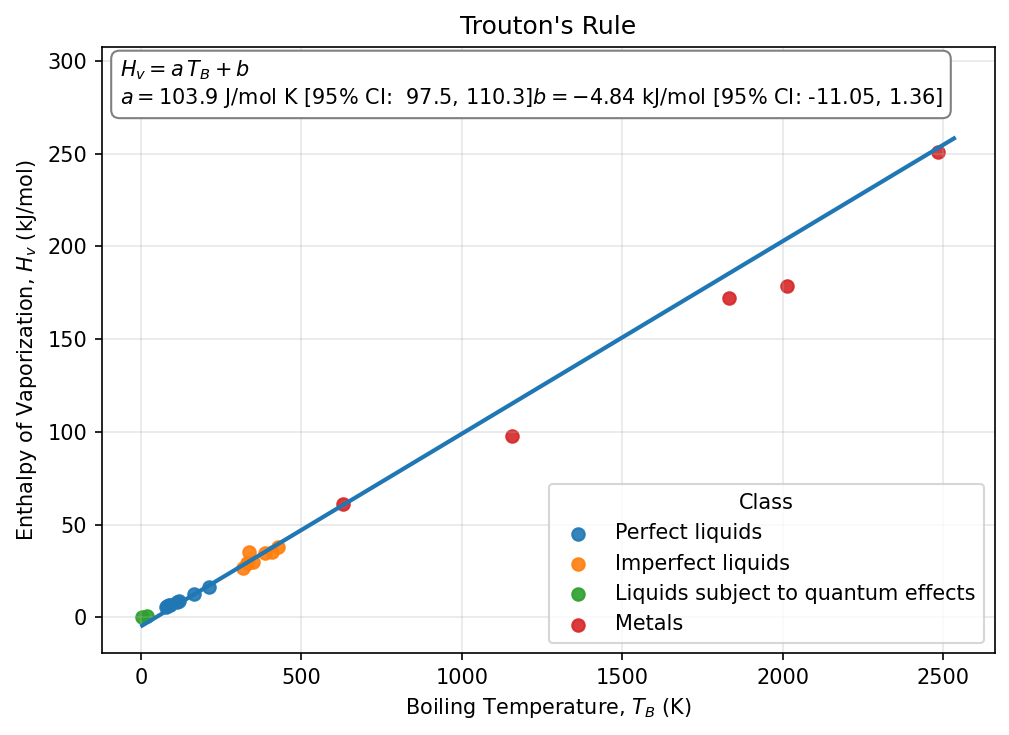

In [2]:
import troutons_rule as tr
import os
import pandas as pd

# Load and rename columns to match what troutons_rule expects
df = pd.read_csv("trouton.csv")
df = df.rename(columns={
    'T_B (K)': 'T_B(K)',
    'H_v (kcal/mol)': 'H_v(kcal/mol)'
})
# Save to a temporary CSV
df.to_csv("trouton_fixed.csv", index=False)

results = tr.run_troutons_rule(csv_path="trouton_fixed.csv", outdir="homework-3-1", save_png=True, show_plot=True)
def summarize_results(r):
        a, (a_lo, a_hi)= r["slope_J_per_molK"], r["slope_CI95_J_per_molK"]
        b, (b_lo, b_hi) = r["intercept_kJ_per_mol"], r["intercept_CI95_kJ_per_mol"]
        n= r["n"]; fig= r["figure_path"] or "not saved"
        return { "slope a (J/mol K)": f"{a:.1f} [95% CI {a_lo:.1f}, {a_hi:.1f}]",
        "intercept b (kJ/mol)": f"{b:.2f} [95% CI: {b_lo:.2f}, {b_hi:.2f}]", 
        "n (points)": n, "figure": fig,}
nice = summarize_results(results)



We know the entropy of vaporization should be equal to the enthalpy of vaporization divided by the temperature, so a should equal the entropy of vaporization minus b divided by the temperature when we rearrange for a in the context of the entropy of vaporization. 
As an approximation a is in roughly the same range as it predicts an entropy of 103.9 J/mol K which is a reasonable value given what we're told about the expected change in entropy from Trouton's rule.
The value of 88 J/mol K works well at temperatures close to standard condition because although it doesn't exactly match the a value, it will match when the a value is adjusted by the temperature dependent term including b, that will decrease the entropy change from 103.9 to closer to the 88 J/mol K when the temperatures are around 300K. This leads me to conclude that our data and calculated slope is a good match for the experimental data and expectations. 